# Case Study on Correlation and Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading The Data Set

In [2]:
data=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.shape


(205, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1.Relatioship between amount spent for ads and profit


<AxesSubplot:>

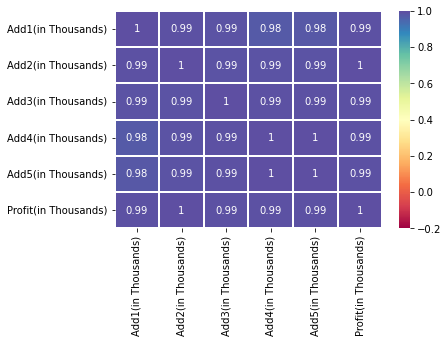

In [4]:
corrmatrix=data.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=1,annot=True,linewidths=0.2,cmap='Spectral')

In [ ]:
Insights:
         We can see a strong positive correlation between Profit and amount spent for advertisement.that is,when we spend more on advertisement,profit will  also increases

# 2. Build a regression model to predict the profit from the given data  


In [7]:
data.columns


Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [97]:
y=data['Profit(in Thousands)']
X=data.drop(['Profit(in Thousands)','Date'],axis=1)

In [98]:
X.shape

(205, 5)

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [100]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [101]:
model = lr.fit(X_train,y_train)

In [102]:
prediction=model.predict(X_test)

In [103]:
from sklearn.metrics import mean_squared_error
print('MSE is:\n ',mean_squared_error(y_test,prediction))

MSE is:
  8.11273293080854e-25


# 3 Predict the profit generated by the company

In [105]:
make_prd=[[290,312,309,298,320]]
model.predict(make_prd).item()

5820.0599999999995